In [2]:
library(forecast)
library(tseries)
library(data.table)
library(xlsx)
library(ggplot2)

Loading required package: rJava
Loading required package: xlsxjars


In [3]:
library("readxl")
my_data <- read_excel("wholegdp_for_ts.xlsx")
drops <- c("X__1")
my_data=my_data[ , !(names(my_data) %in% drops)]
# my_data

In [4]:
# need to reverse the order
# str(my_data$year)
# str(my_data)
my_data$year<-as.numeric(my_data$year)
# str(my_data$year)
# reverse the year
newdata <- my_data[order(my_data$year),] 

newdata$year
str(newdata$year)

# data=newdata[c('year','USA','CHN')]

# data[data$year <= 2007] 
train=subset(newdata, year <= 2008& year>=2000)
# train
test=subset(newdata, year == 2009)
# test

real=subset(test[,!(names(test) %in% c('year'))])
real

[1] 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
[16] 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
[31] 2015 2016

 num [1:32] 1985 1986 1987 1988 1989 ...


AGO,ALB,ARE,ARG,ATG,AUS,AUT,BDI,BEL,BEN,⋯,UGA,URY,USA,VCT,VNM,VUT,WSM,ZAF,ZMB,ZWE
75492384801,12044212904,253547358747,332976484578,1217719667,927168311000,397594276188,1739781489,484552653515,7097198712,⋯,21203769125,31660911290,1.441874e+13,674922481,106014601171,610066629,560967765,295936485833,15328342304,8366794000


In [5]:
drops <- c("year")
data=newdata[ , !(names(newdata) %in% drops)]
ctr_list=names(data)
# str(ctr_list)

# length(ctr_list)
# str(ctr_list[1])

# data=train[ ,ctr_list[1]]
# str(data)
# auto.arima(data)

In [6]:
# austrlia
# keeps<-c("AUS")
# data=newdata[ , (names(newdata) %in% keeps)]
# data

# data=train[ , 'AUS']
# #     data=train$col
# fit <- auto.arima(data)
# fcast <- forecast(fit,h=2)

# fcast
# fcast$mean
# # pre<-as.data.frame(fcast$mean)[2:2,]

# fit

# # fcast[10]

# # plot(newdata$year,newdata$AUS)

In [7]:
predict = NULL
mod=NULL

len=length(ctr_list)
for (i in 1:len)
{
    m=''
    col=ctr_list[i]
    data=train[ , col]
#     data=train$col
    fit <- auto.arima(data)
    fcast <- forecast(fit,h=1)
    modelindex<-arimaorder(fit)
    pre<-as.data.frame(fcast$mean)[1:1,]
    predict <- c(predict, pre)
#     print(mod)
    for (item in modelindex){
        m=paste(item,m)
    }
    mod<-c(mod,m)
}

df <- as.data.frame(real)
df <- rbind(df,predict)
# real is first row
# predict is second row
# df


df <- rbind(df, df[1, ] - df[2, ])
df <- rbind(df, (df[1, ] - df[2, ])/df[2,])
# df

df <- rbind(df,mod)          
df

AGO,ALB,ARE,ARG,ATG,AUS,AUT,BDI,BEL,BEN,⋯,UGA,URY,USA,VCT,VNM,VUT,WSM,ZAF,ZMB,ZWE
75492384801.3695,12044212903.8168,253547358747.447,332976484577.619,1217719666.66667,927168310999.853,397594276187.83,1739781488.7457,484552653514.865,7097198711.61023,⋯,21203769124.656,31660911290.3226,1.4418739e+13,674922481.481482,106014601171.036,610066628.693058,560967765.481746,295936485832.635,15328342303.9575,8366794000
107907144159.962,14037516285.2442,373033098053.098,0,1417078185.18519,1256905028097.89,427611527757.434,1867190385.10917,553716184125.258,7703237490.88098,⋯,16185239656.0453,19308844574.1585,15272807374979,732823708.333454,120846182666.01,689488922.341742,691033710.633771,286769839732.726,21764759299.5448,4131420950.00431
-32414759358.5921,-1993303381.42743,-119485739305.651,332976484577.619,-199358518.51852,-329736717098.037,-30017251569.604,-127408896.36347,-69163530610.3928,-606038779.270746,⋯,5018529468.6107,12352066716.1641,-854068374979.023,-57901226.8519719,-14831581494.9736,-79422293.6486839,-130065945.152025,9166646099.909,-6436416995.5873,4235373049.99569
-0.300394933170879,-0.141998295205735,-0.320308680192885,Inf,-0.140682794077778,-0.262340200513826,-0.070197479771012,-0.068235621487533,-0.12490790876856,-0.0786732565350828,⋯,0.310068282908387,0.639710297978943,-0.0559208503066841,-0.0790111266782669,-0.122731071580181,-0.115190093814616,-0.188219392412473,0.0319651679843754,-0.295726541562163,1.02516134309462
0 2 0,0 1 0,0 2 0,0 0 0,0 2 0,0 2 0,0 1 0,0 2 0,0 1 0,0 1 0,⋯,0 2 0,0 0 0,0 1 0,0 1 0,0 2 0,0 2 0,0 1 0,0 1 0,0 2 0,0 1 0


In [8]:
data=subset(newdata, year == 2006)
drops <- c("year")
data=data[ , !(names(data) %in% drops)]
# data
df<-rbind(df,data)

data=subset(newdata, year == 2007)
drops <- c("year")
data=data[ , !(names(data) %in% drops)]
df<-rbind(df,data)

data=subset(newdata, year == 2008)
drops <- c("year")
data=data[ , !(names(data) %in% drops)]


df<-rbind(df,data)
# df

df_adding3years=df

df



AGO,ALB,ARE,ARG,ATG,AUS,AUT,BDI,BEL,BEN,⋯,UGA,URY,USA,VCT,VNM,VUT,WSM,ZAF,ZMB,ZWE
75492384801.3695,12044212903.8168,253547358747.447,332976484577.619,1217719666.66667,927168310999.853,397594276187.83,1739781488.7457,484552653514.865,7097198711.61023,⋯,21203769124.656,31660911290.3226,1.4418739e+13,674922481.481482,106014601171.036,610066628.693058,560967765.481746,295936485832.635,15328342303.9575,8366794000
107907144159.962,14037516285.2442,373033098053.098,0,1417078185.18519,1256905028097.89,427611527757.434,1867190385.10917,553716184125.258,7703237490.88098,⋯,16185239656.0453,19308844574.1585,15272807374979,732823708.333454,120846182666.01,689488922.341742,691033710.633771,286769839732.726,21764759299.5448,4131420950.00431
-32414759358.5921,-1993303381.42743,-119485739305.651,332976484577.619,-199358518.51852,-329736717098.037,-30017251569.604,-127408896.36347,-69163530610.3928,-606038779.270746,⋯,5018529468.6107,12352066716.1641,-854068374979.023,-57901226.8519719,-14831581494.9736,-79422293.6486839,-130065945.152025,9166646099.909,-6436416995.5873,4235373049.99569
-0.300394933170879,-0.141998295205735,-0.320308680192885,Inf,-0.140682794077778,-0.262340200513826,-0.070197479771012,-0.068235621487533,-0.12490790876856,-0.0786732565350828,⋯,0.310068282908387,0.639710297978943,-0.0559208503066841,-0.0790111266782669,-0.122731071580181,-0.115190093814616,-0.188219392412473,0.0319651679843754,-0.295726541562163,1.02516134309462
0 2 0,0 1 0,0 2 0,0 0 0,0 2 0,0 2 0,0 1 0,0 2 0,0 1 0,0 1 0,⋯,0 2 0,0 0 0,0 1 0,0 1 0,0 2 0,0 2 0,0 1 0,0 1 0,0 2 0,0 1 0
41789478661.3096,8992642348.7871,222116541865.214,232557260817.308,1149025481.48148,747572626534.891,334309371471.584,1273180597.02711,409813072387.404,5142380779.44103,⋯,9942597779.99265,19579457966.0538,1.3855888e+13,610930044.444444,66371664817.0436,439376794.094041,508505414.405727,271638484826.109,12756858899.2812,5443896500
60448921272.2326,10701011896.7708,257916133424.098,287530508430.568,1302388925.92593,853764622752.61,386458951546.674,1356078278.18821,471821790309.335,5969535131.58016,⋯,12292813603.2327,23410572621.533,1.4477635e+13,651833314.814815,77414425532.2452,526428309.945088,550967295.278082,299415505152.298,14056957976.2648,5291950100
84178032716.0971,12881352687.7773,315474615738.598,361558037110.419,1359733555.55556,1055334825425.25,427611527757.434,1611634331.64869,518626043650.212,7132787396.66547,⋯,14239026629.639,30366213095.4256,1.4718582e+13,695428851.851852,99130304099.1274,607958616.143415,644143266.155792,286769839732.726,17910858637.9048,4415702800


In [9]:
df_before_transpose=df_adding3years
df_after_transpose=transpose(setDT(df_before_transpose))

colnames(df_after_transpose) <- c('real','predict_arima','drop','drop_per_cent','mod','gdp2006','gdp2007','gdp2008')
rownames(df_after_transpose) <- ctr_list

# some countries are predicted to be infinit due to predict 0 - drop this in excel later.


df_after_transpose$iso3 <- ctr_list


# df_after_transpose




In [10]:
df_after_transpose$predict_by2006<-as.numeric(df_after_transpose$gdp2008)*as.numeric(df_after_transpose$gdp2007)/as.numeric(df_after_transpose$gdp2006)
df_after_transpose$predict_by2007<-as.numeric(df_after_transpose$gdp2008)*as.numeric(df_after_transpose$gdp2008)/as.numeric(df_after_transpose$gdp2007)

df_pred=df_after_transpose
# df_after_transpose

# df_clean <- subset(df, mod!='0 0 0')
# df_clean<-subset(df,predict!=0)


In [11]:
data=df_pred
data=data[data$mod!='0 0 0 ']
# data[data$predict!=0]
# data=data[data$predict!=0]

In [12]:
output=data
write.xlsx(output, "prediction_gdp_2000-2008for2009.xlsx")

In [15]:
# output

Example on a single country

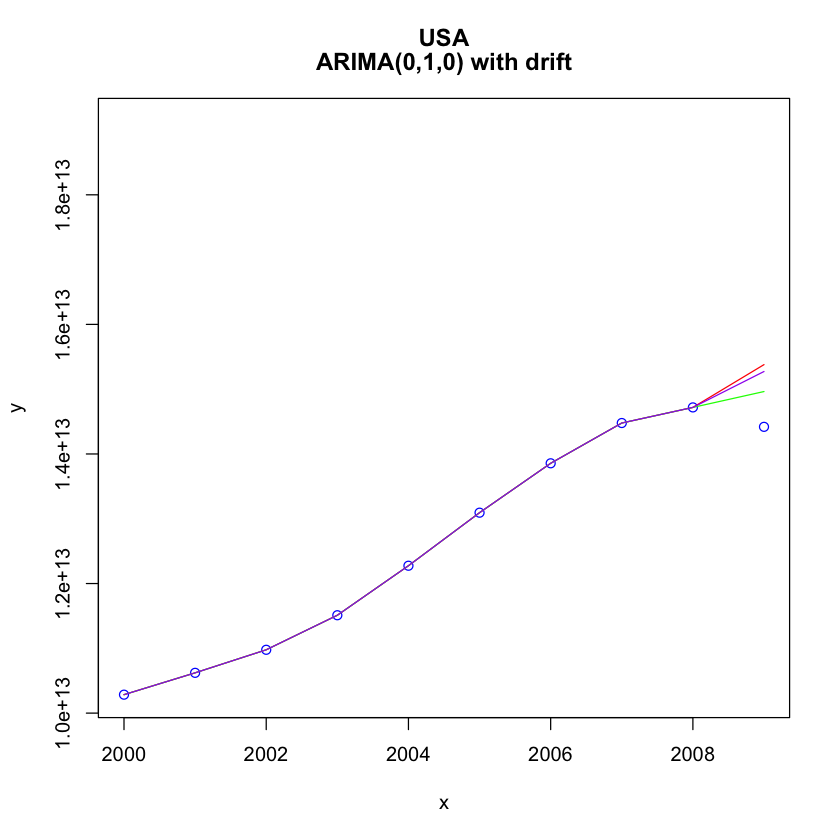

In [19]:
ctr_name='USA'

data=subset(newdata, year <= 2008&year>=2000)[[ctr_name]]
fit <- auto.arima(data)
n=1
fcast <- forecast(fit,h=n)
pre=fcast$mean[n]
mod=arimaorder(fit)

# fit

# pre



plot_name= cbind(toString(ctr_name), toString(fit))
y=subset(newdata, year <= 2009&year>=2000)[[ctr_name]]
x=subset(newdata, year <= 2009&year>=2000)$year
plot(x,y,col="blue",main=plot_name,ylim=c(min(y),max(y)*1.3))



# y=c(fcast$fitted,pre)
# x=subset(newdata, year <= 2009&year>=2000)$year
# lines(x,y,col="red")



real_before=subset(newdata, year <= 2008&year>=2000)[[ctr_name]]
# real_before
pre_by_growth2006=subset(output,iso3==ctr_name)$predict_by2006
# pre_by_growth
y=c(real_before,pre_by_growth2006)
# y
x=subset(newdata, year <= 2009&year>=2000)$year
lines(x,y,col="red")


real_before=subset(newdata, year <= 2008&year>=2000)[[ctr_name]]
# real_before
pre_by_growth2007=subset(output,iso3==ctr_name)$predict_by2007
# pre_by_growth
y=c(real_before,pre_by_growth2007)
# y
x=subset(newdata, year <= 2009&year>=2000)$year
lines(x,y,col="green")



real_before=subset(newdata, year <= 2008&year>=2000)[[ctr_name]]
y=c(real_before,pre)
x=subset(newdata, year <= 2009&year>=2000)$year
lines(x,y,col="purple")



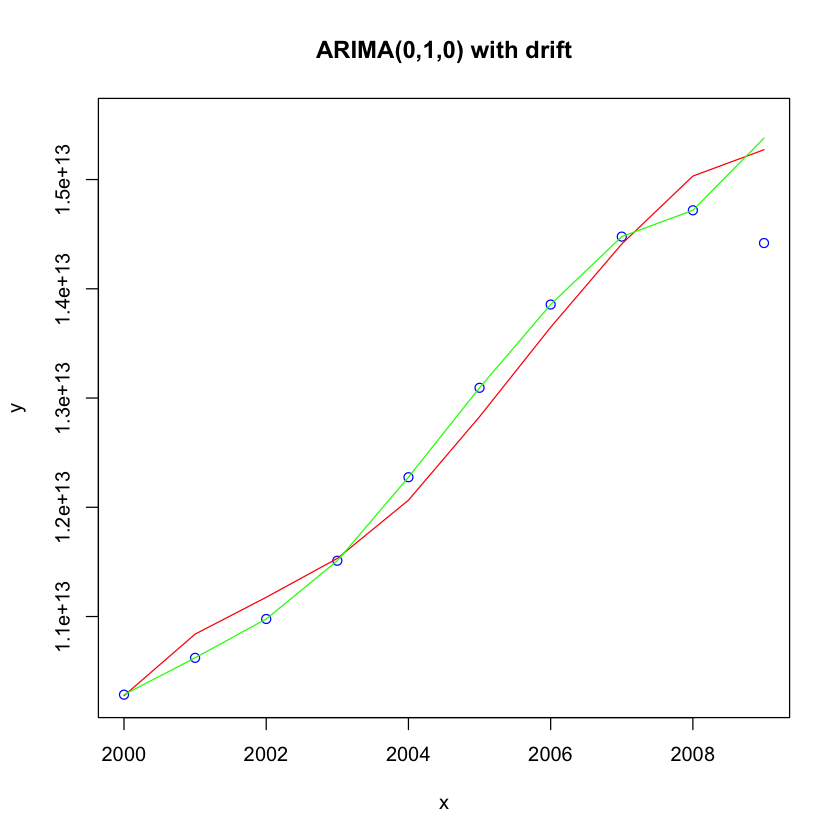

In [352]:
# ctr_name=LBR

data=subset(newdata, year <= 2008&year>=2000)$USA
fit <- auto.arima(data)
n=1
fcast <- forecast(fit,h=n)
pre=fcast$mean[n]
mod=arimaorder(fit)

# fit

# pre
# subset(newdata, year == 2009)$LBR

yrange=c(min(y),max(y)*1.01)


y=subset(newdata, year <= 2009&year>=2000)$USA
x=subset(newdata, year <= 2009&year>=2000)$year
plot(x,y,col="blue",main=fit,ylim=yrange)

y=c(fcast$fitted,pre)
x=subset(newdata, year <= 2009&year>=2000)$year
lines(x,y,col="red")



real_before=subset(newdata, year <= 2008&year>=2000)$USA
# real_before
pre_by_growth=subset(df_pred,iso3=='USA')$predict_growth
# pre_by_growth
y=c(real_before,pre_by_growth)
# y
x=subset(newdata, year <= 2009&year>=2000)$year
lines(x,y,col="green")




In [335]:
subset(newdata, year <= 2009&year>=2000)$SWZ

[1] 1738100848 1542477355 1432228173 2197612761 2770082815 3178126548
 [7] 3291353813 3469363931 3294093360 3580417157

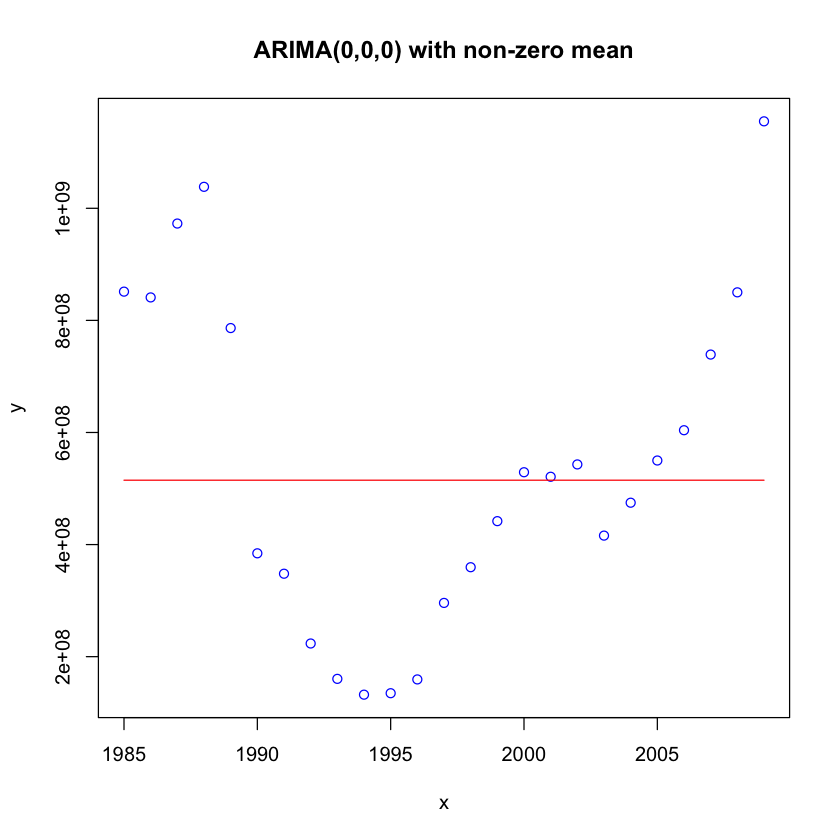

In [270]:
# ctr_name=LBR

data=subset(newdata, year <= 2008)$LBR
fit <- auto.arima(data)
n=1
fcast <- forecast(fit,h=n)
pre=fcast$mean[n]
mod=arimaorder(fit)

# fit

# pre
# subset(newdata, year == 2009)$LBR


y=subset(newdata, year <= 2009)$LBR
x=subset(newdata, year <= 2009)$year
plot(x,y,col="blue",main=fit)

y=c(fcast$fitted,pre)
x=subset(newdata, year <= 2009)$year
lines(x,y,col="red")



[1] 0 2 0

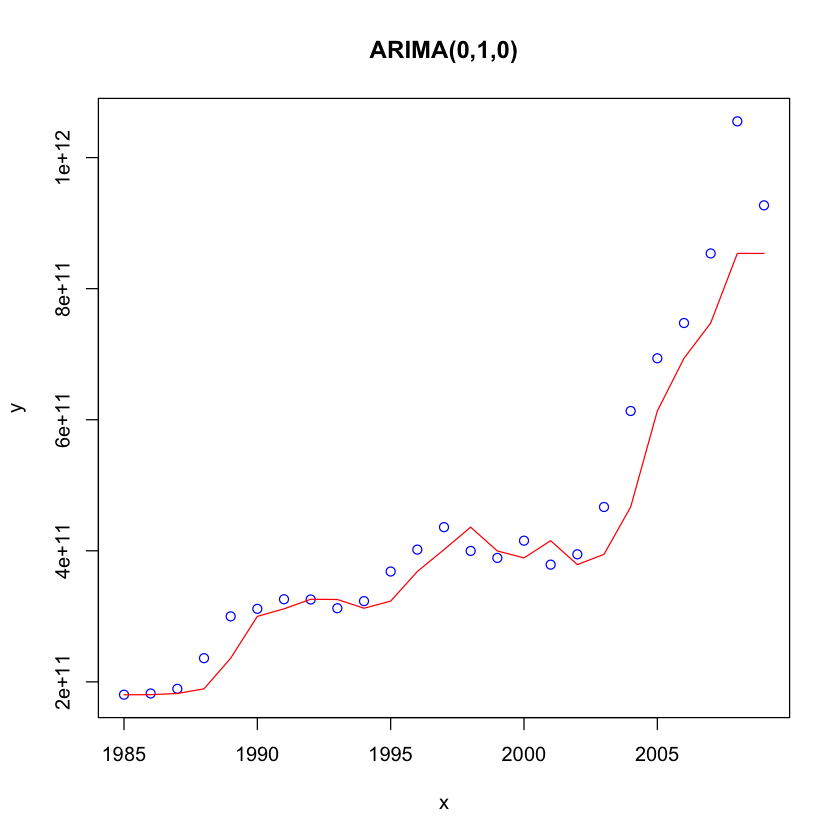

In [121]:
data=subset(newdata, year <= 2007)$AUS
fit <- auto.arima(data)
n=2
fcast <- forecast(fit,h=n)
pre=fcast$mean[n]
mod=arimaorder(fit)

# pre
# mod


y=subset(newdata, year <= 2009)$AUS
x=subset(newdata, year <= 2009)$year
plot(x,y,col="blue",main=fit)

y=c(fcast$fitted,fcast$mean[1],fcast$mean[2])
x=subset(newdata, year <= 2009)$year
lines(x,y,col="red")

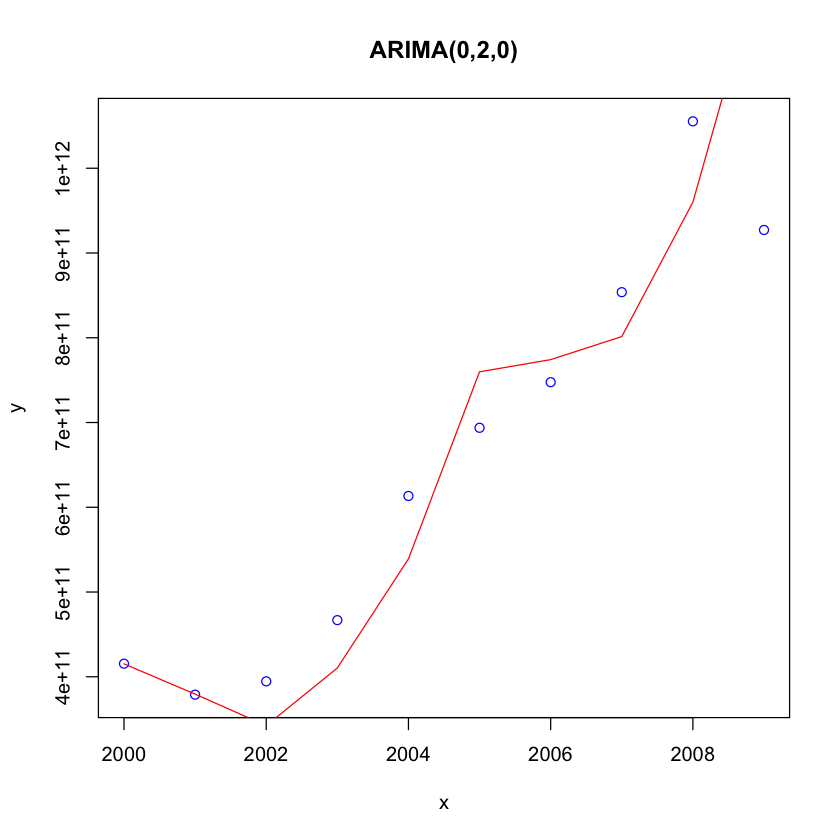

In [140]:
data=subset(newdata, year <= 2008 & year>=2000)$AUS
fit <- auto.arima(data)
n=1
fcast <- forecast(fit,h=n)
pre=fcast$mean[n]
mod=arimaorder(fit)

# pre
# mod


y=subset(newdata, year <= 2009 & year>=2000)$AUS
x=subset(newdata, year <= 2009 & year>=2000)$year
plot(x,y,col="blue",main=fit)

y=c(fcast$fitted,pre)
x=subset(newdata, year <= 2009 & year>=2000)$year
lines(x,y,col="red")

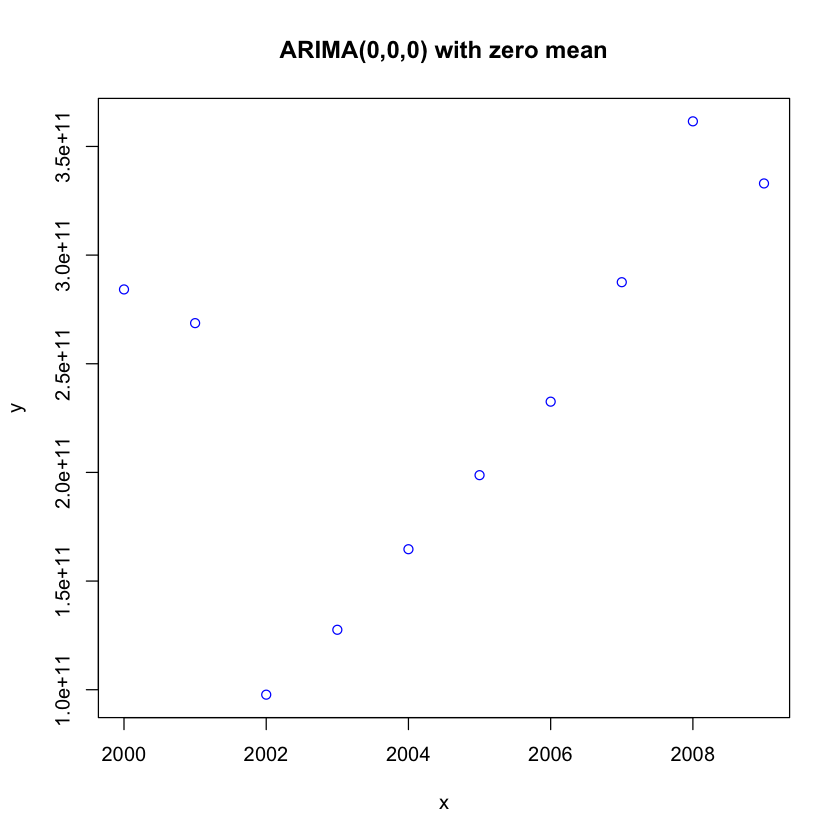

In [152]:


data=subset(newdata, year <= 2008 & year>=2000)$ARG
fit <- auto.arima(data)
n=1
fcast <- forecast(fit,h=n)
pre=fcast$mean[n]
mod=arimaorder(fit)

# pre
# mod


y=subset(newdata, year <= 2009 & year>=2000)$ARG
x=subset(newdata, year <= 2009 & year>=2000)$year
plot(x,y,col="blue",main=fit)

y=c(fcast$fitted,pre)
x=subset(newdata, year <= 2009 & year>=2000)$year
lines(x,y,col="red")

In [53]:
fcast[2]

$model
Series: data 
ARIMA(1,2,1) 

Coefficients:
         ar1      ma1
      0.3856  -0.7966
s.e.  0.2192   0.1317

sigma^2 estimated as 149728:  log likelihood=-264.77
AIC=535.54   AICc=536.29   BIC=540.29


In [50]:
fcast[9]

$fitted
Time Series:
Start = 1 
End = 38 
Frequency = 1 
 [1]  5244.537  5629.641  6009.521  6574.287  7300.314  7739.522  8366.849
 [8]  9293.664 10218.681 11510.126 12653.440 13465.215 15158.299 15091.434
[15] 16570.693 18431.949 19365.202 20048.308 21098.871 22712.351 24216.199
[22] 25038.005 25135.811 26541.892 27453.441 28962.012 29812.893 31259.045
[29] 32911.511 34246.350 36108.101 38067.151 38341.943 39225.056 41066.753
[36] 43768.084 46318.557 48372.730


In [56]:
fcast[4]

$mean
Time Series:
Start = 39 
End = 40 
Frequency = 1 
[1] 49739.31 51437.64


In [54]:
fcast[10]

$residuals
Time Series:
Start = 1 
End = 38 
Frequency = 1 
 [1]    2.346477   -6.197402  100.404682  167.045620  -57.872549   80.543462
 [7]  244.553028  177.642326  368.604648  185.428623  -55.772921  527.951938
[13] -719.322606  469.992658  563.593157 -162.527103 -250.149261   52.550810
[19]  384.362116  210.086219 -261.719530 -632.840257  357.140998  -77.039461
[25]  323.194606 -179.837331  255.337784  313.644800   37.686330  374.579250
[31]  341.753659 -793.533046 -175.905551  452.142370  855.056415  539.836445
[37]  118.510160 -311.192170


In [68]:
as.data.frame(fcast$mean)




x
49739.31
51437.64


In [69]:
as.data.frame(fcast$mean)[2:2,]

[1] 51437.64

Warning message in year == c(2007, 2008):
“longer object length is not a multiple of shorter object length”

year,USA,CHN


In [30]:
train[year<=2007]

data=train$USA


data=newdata[c('year','USA','CHN')]

# data[data$year <= 2007] 


# train

ERROR: Error in check_names_df(i, x): object 'year' not found


In [ ]:
pred <- function(data, startDate, endDate, p, n) {
    fit <- auto.arima(data)
    # fit2 = arima(deseasonal_cnt, order=c(1,1,7))
    fcast <- forecast(fit,h=n)
    # return (data)
    result<-as.data.frame(do.call(rbind, fcast))
    return (result)
}